<a href="https://colab.research.google.com/github/JadeilsonSantos/Classificador_Imagens/blob/main/Classificador_Imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### DATASET

In [1]:
!git clone  https://github.com/JadeilsonSantos/Classificador_Imagens.git

Cloning into 'Classificador_Imagens'...
remote: Enumerating objects: 355, done.
remote: Counting objects: 100% (355/355), done.
remote: Compressing objects: 100% (354/354), done.
remote: Total 355 (delta 0), reused 355 (delta 0), pack-reused 0
Receiving objects: 100% (355/355), 12.31 MiB | 26.03 MiB/s, done.


In [136]:
!pip install tensorflow

In [137]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [138]:
dataset_dir = os.path.join(os.getcwd(), 'Classificador_Imagens')

dataset_train_dir = os.path.join(dataset_dir, 'train')
dataset_train_Tomates_len = len(os.listdir(os.path.join(dataset_train_dir, 'Tomates')))
dataset_train_Cenouras_len = len(os.listdir(os.path.join(dataset_train_dir, 'Cenouras')))
dataset_train_Cenouras_len = len(os.listdir(os.path.join(dataset_train_dir, 'Cebolas')))

dataset_validation_dir = os.path.join(dataset_dir, 'valid')
dataset_validation_Tomates_len = len(os.listdir(os.path.join(dataset_validation_dir, 'Tomates')))
dataset_validation_Cenouras_len = len(os.listdir(os.path.join(dataset_validation_dir, 'Cenouras')))
dataset_validation_Cebolas_len = len(os.listdir(os.path.join(dataset_validation_dir, 'Cebolas')))

dataset_test_dir = os.path.join(dataset_dir, 'test')
dataset_test_Tomates_len = len(os.listdir(os.path.join(dataset_test_dir, 'Tomates')))
dataset_test_Cenouras_len = len(os.listdir(os.path.join(dataset_test_dir, 'Cenouras')))
dataset_test_Cebolas_len = len(os.listdir(os.path.join(dataset_test_dir, 'Cebolas')))


print('Train Tomates: %s' % dataset_train_Tomates_len)
print('Train Cenouras: %s' % dataset_train_Cenouras_len)
print('Train Cebolas: %s' % dataset_train_Cenouras_len)
print('Validation Tomates: %s' % dataset_validation_Tomates_len)
print('Validation Cenouras: %s' % dataset_validation_Cenouras_len)
print('Validation Cebolas: %s' % dataset_validation_Cebolas_len)
print('Test Tomates: %s' % dataset_test_Tomates_len)
print('Test Cenouras: %s' % dataset_test_Cenouras_len)
print('Test Cebolas: %s' % dataset_test_Cebolas_len)


Train Tomates: 83
Train Cenouras: 71
Train Cebolas: 71
Validation Tomates: 25
Validation Cenouras: 23
Validation Cebolas: 19
Test Tomates: 9
Test Cenouras: 11
Test Cebolas: 14


In [139]:
image_width = 256
image_height = 256
image_color_channel = 3
image_color_channel_size = 255
image_size = (image_width, image_height)
image_shape = image_size + (image_color_channel,)

batch_size = 32
epochs = 50
learning_rate = 0.0001

class_names = ['cebola', 'cenoura','tomate']

In [140]:
dataset_train = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_train_dir,
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True
)

Found 235 files belonging to 3 classes.


In [141]:
dataset_validation = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_validation_dir,
    image_size = (image_width, image_height),
    batch_size = batch_size,
    shuffle = True
)

Found 67 files belonging to 3 classes.


In [142]:
dataset_test = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_test_dir,
    image_size = (image_width, image_height),
    batch_size = batch_size,
    shuffle = True
)

Found 34 files belonging to 3 classes.


In [45]:
#dataset_validation_cardinality = tf.data.experimental.cardinality(dataset_validation)
#dataset_validation_batches = dataset_validation_cardinality // 5

#dataset_test = dataset_validation.take(dataset_validation_batches)
#dataset_validation = dataset_validation.skip(dataset_validation_batches)

print('Validation Dataset Cardinality: %d' % tf.data.experimental.cardinality(dataset_validation))
print('Test Dataset Cardinality: %d' % tf.data.experimental.cardinality(dataset_test))

Validation Dataset Cardinality: 3
Test Dataset Cardinality: 2


In [143]:
autotune = tf.data.AUTOTUNE

dataset_train = dataset_train.prefetch(buffer_size = autotune)
dataset_validation = dataset_validation.prefetch(buffer_size = autotune)
dataset_test = dataset_test.prefetch(buffer_size = autotune)

In [144]:
def plot_dataset(dataset):

    plt.gcf().clear()
    plt.figure(figsize = (15, 15))

    for features, labels in dataset.take(1):

        for i in range(9):

            plt.subplot(3, 3, i + 1)
            plt.axis('off')

            plt.imshow(features[i].numpy().astype('uint8'))
            plt.title(class_names[labels[i]])

<Figure size 640x480 with 0 Axes>

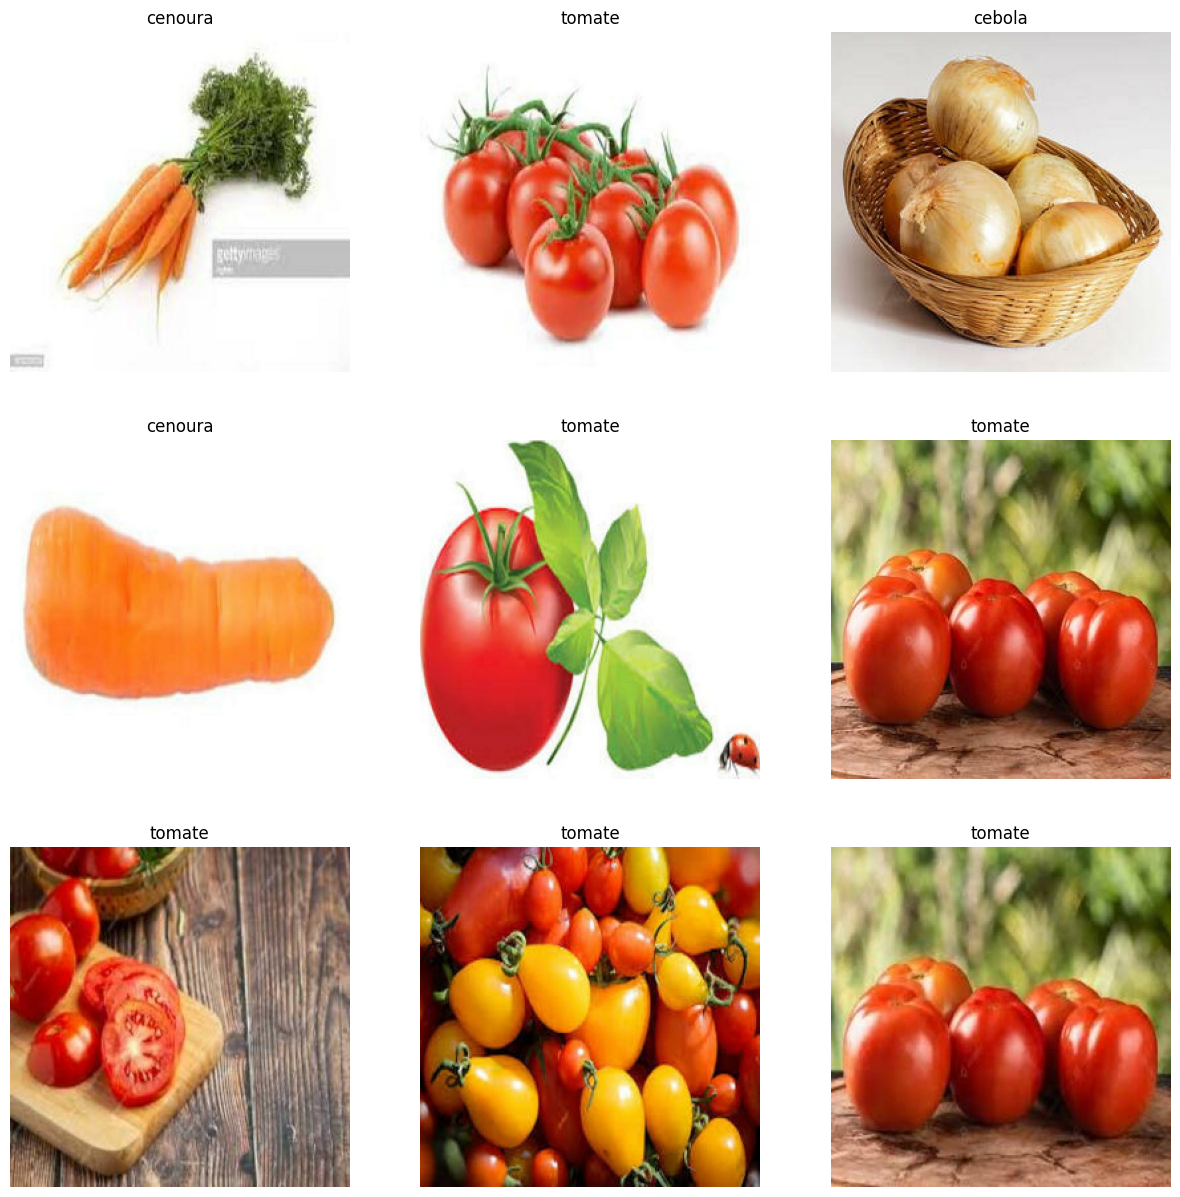

In [145]:
plot_dataset(dataset_train)

<Figure size 640x480 with 0 Axes>

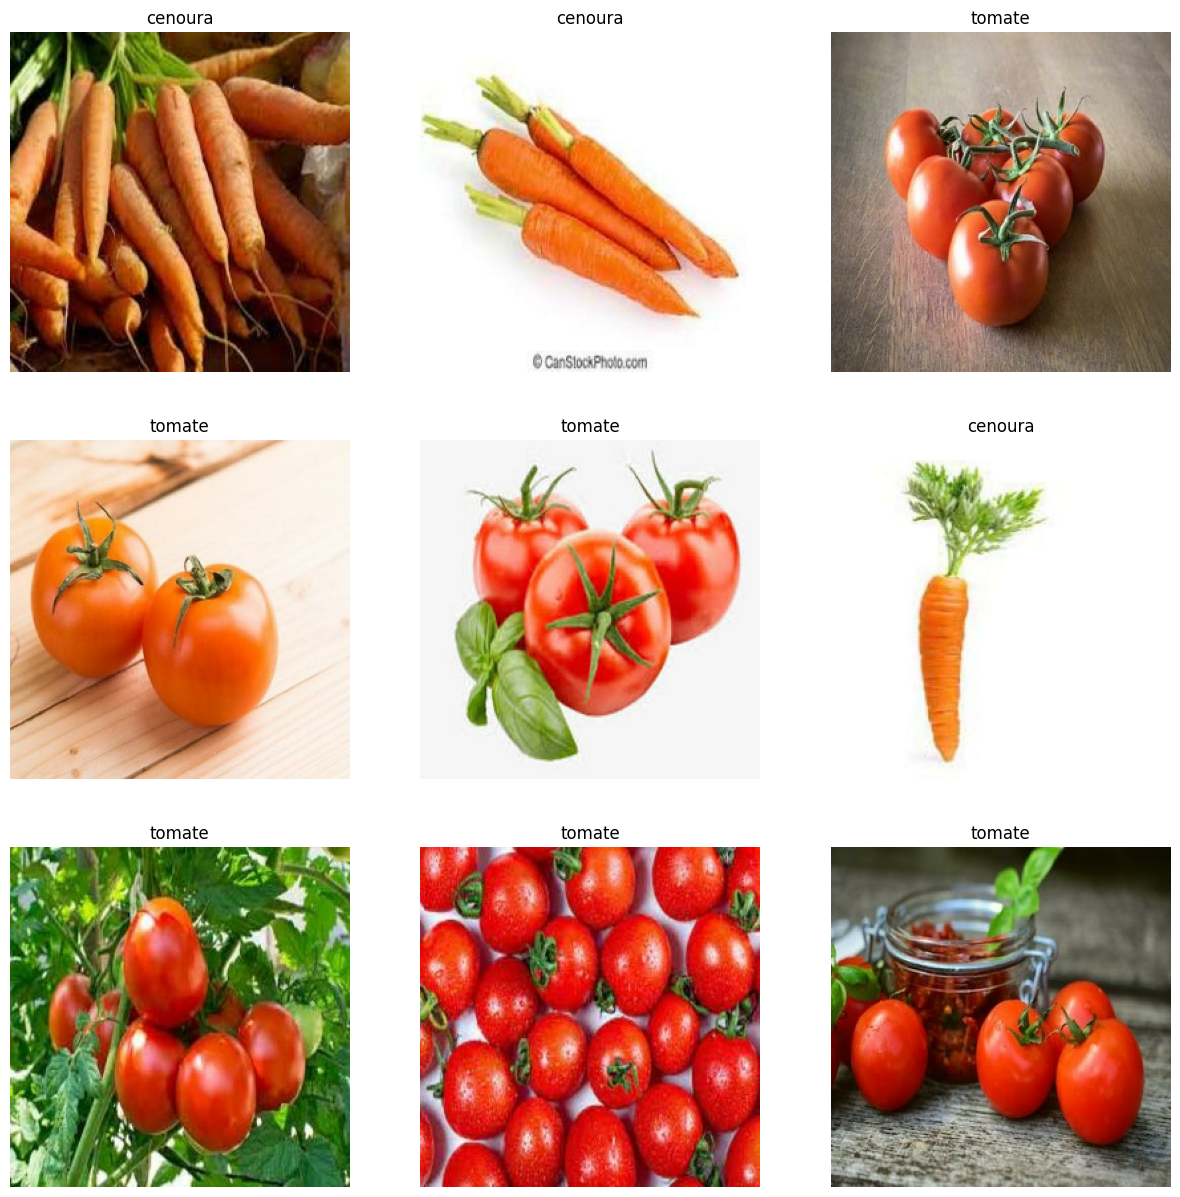

In [146]:
plot_dataset(dataset_validation)

<Figure size 640x480 with 0 Axes>

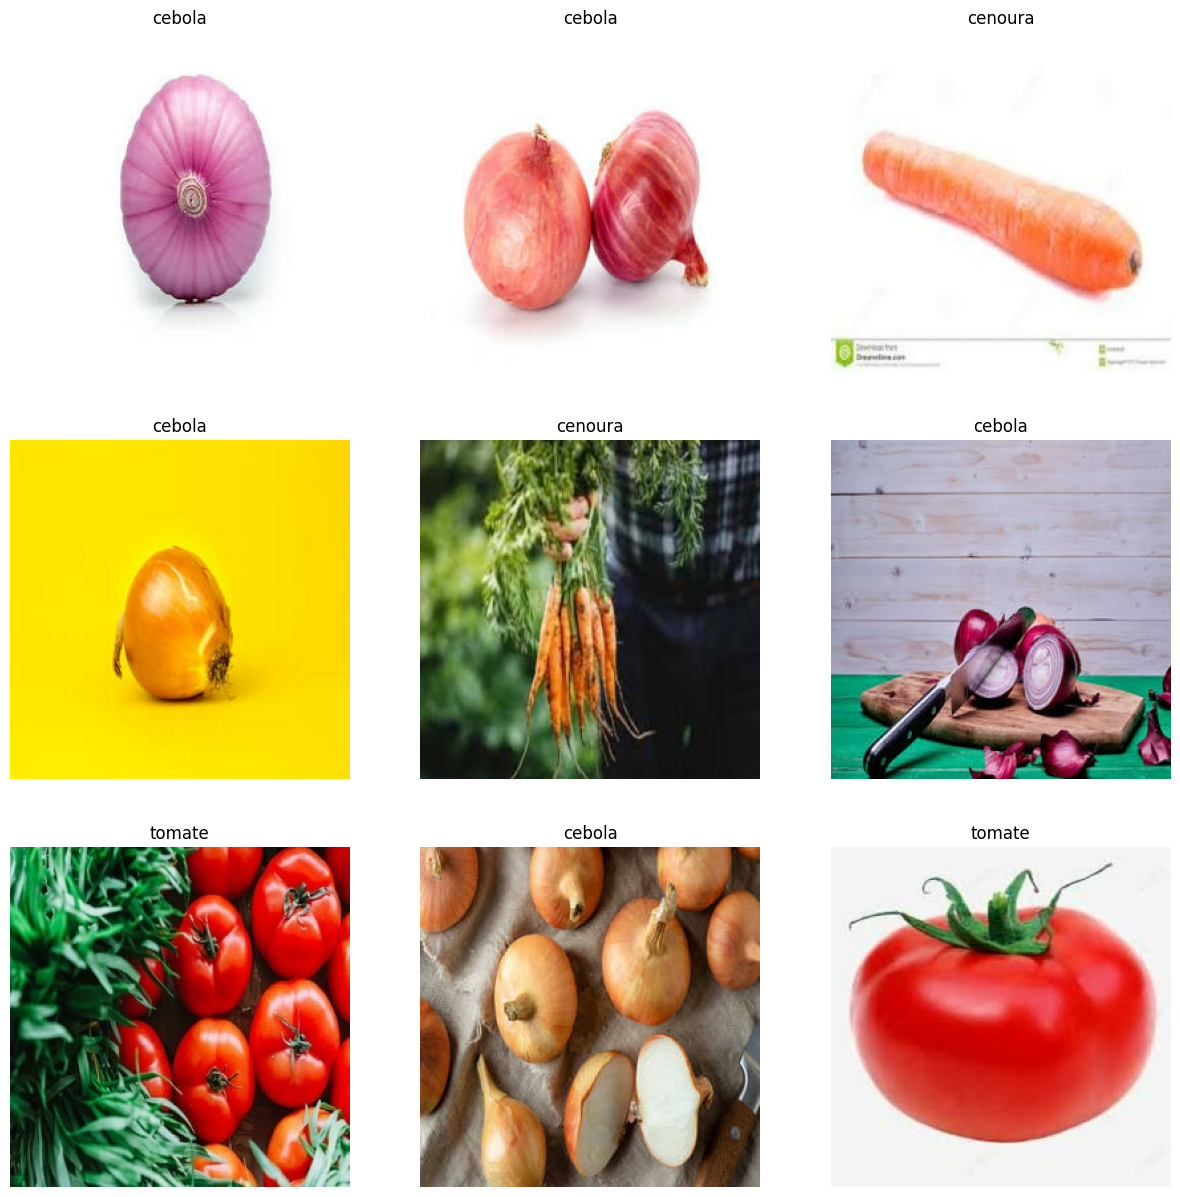

In [147]:
plot_dataset(dataset_test)

### DATA AUGMENTATION

In [148]:
data_augmentation = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
])

In [149]:
def plot_dataset_data_augmentation(dataset):

    plt.gcf().clear()
    plt.figure(figsize = (15, 15))

    for features, _ in dataset.take(1):

        feature = features[0]

        for i in range(9):

            feature_data_augmentation = data_augmentation(tf.expand_dims(feature, 0))

            plt.subplot(3, 3, i + 1)
            plt.axis('off')

            plt.imshow(feature_data_augmentation[0] / image_color_channel_size)

<Figure size 640x480 with 0 Axes>

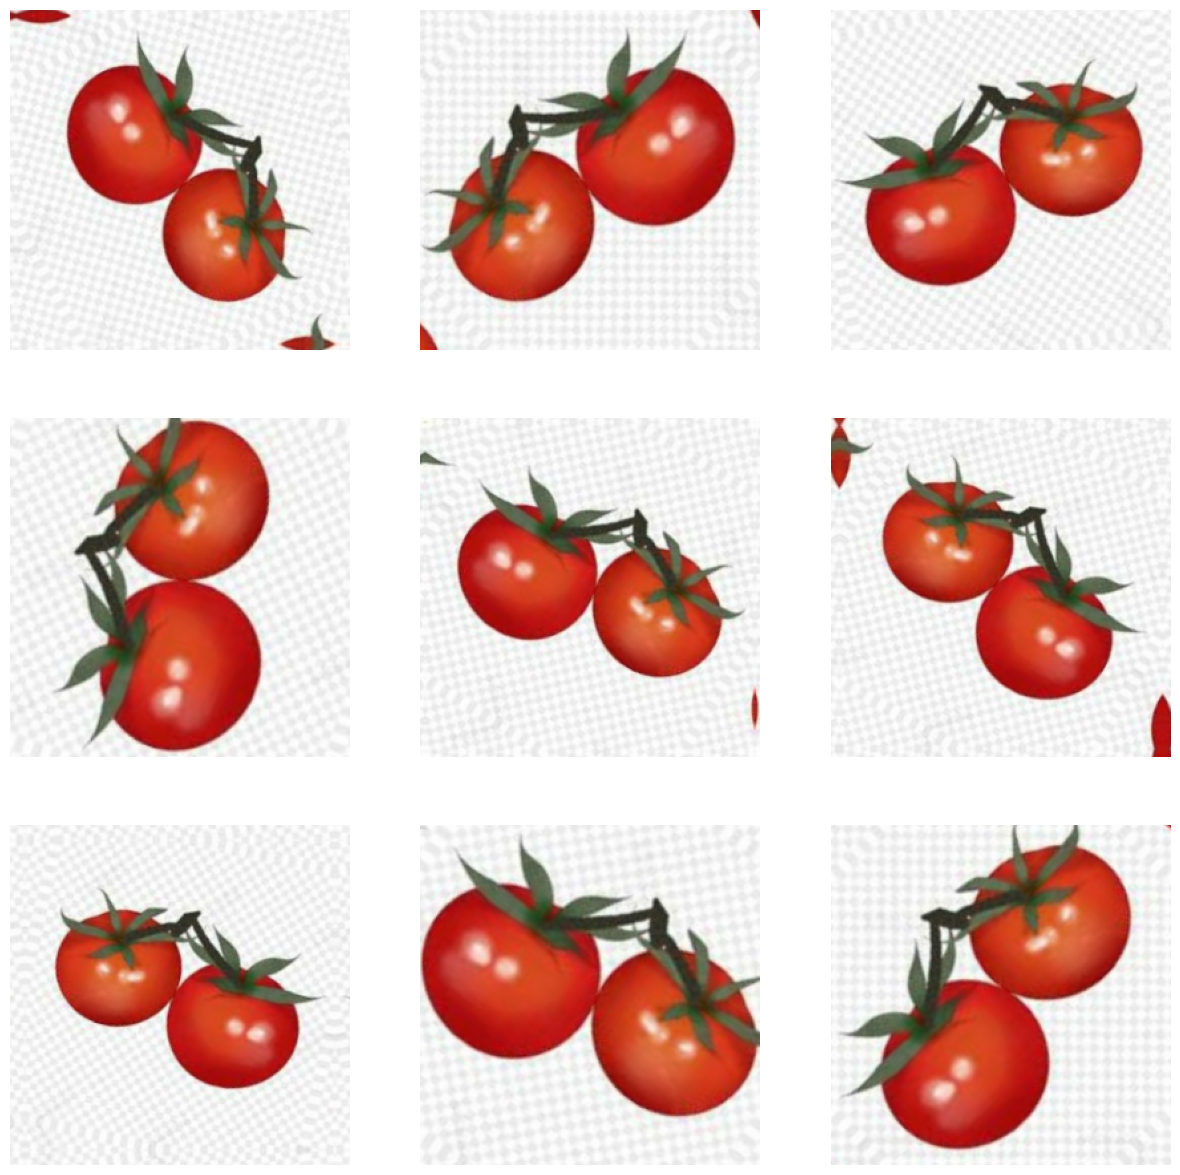

In [150]:
plot_dataset_data_augmentation(dataset_train)

### LAYER RESCALING

In [151]:
rescaling = tf.keras.layers.experimental.preprocessing.Rescaling(1. / (image_color_channel_size / 2.), offset = -1, input_shape = image_shape)

### TRANSFER LEARNING

In [152]:
model_transfer_learning = tf.keras.applications.MobileNetV2(input_shape = image_shape, include_top = False, weights = 'imagenet')
model_transfer_learning.trainable = False

model_transfer_learning.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 128, 128, 32)         864       ['input_7[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 128, 128, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 128, 128, 32)         0         ['bn_Conv1[

### EARLY STOPPING

In [153]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 3)

### MODEL

In [154]:
model = tf.keras.models.Sequential([
    rescaling,
    data_augmentation,
    model_transfer_learning,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation = 'relu')
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 sequential_12 (Sequential)  (None, 256, 256, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 8, 8, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_7  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_7 (Dropout)         (None, 1280)              0         
                                                                 
 dense_7 (Dense)             (None, 1)               

In [155]:
history = model.fit(
    dataset_train,
    validation_data = dataset_validation,
    epochs = epochs,
    callbacks = [
        early_stopping
    ]
)

Epoch 1/20
8/8 [==============================] - 5s 222ms/step - loss: -0.5431 - accuracy: 0.3319 - val_loss: -2.5823 - val_accuracy: 0.3731
Epoch 2/20
8/8 [==============================] - 1s 95ms/step - loss: -0.4219 - accuracy: 0.2979 - val_loss: -3.0339 - val_accuracy: 0.3881
Epoch 3/20
8/8 [==============================] - 2s 153ms/step - loss: -1.1704 - accuracy: 0.3234 - val_loss: -3.5112 - val_accuracy: 0.3881
Epoch 4/20
8/8 [==============================] - 1s 106ms/step - loss: -1.6026 - accuracy: 0.3660 - val_loss: -3.8682 - val_accuracy: 0.3731
Epoch 5/20
8/8 [==============================] - 1s 94ms/step - loss: -1.5489 - accuracy: 0.3702 - val_loss: -3.6664 - val_accuracy: 0.4179
Epoch 6/20
8/8 [==============================] - 1s 95ms/step - loss: -1.6566 - accuracy: 0.3660 - val_loss: -3.5685 - val_accuracy: 0.4179
Epoch 7/20
8/8 [==============================] - 1s 93ms/step - loss: -2.2189 - accuracy: 0.4000 - val_loss: -3.8900 - val_accuracy: 0.4179
Epoch 8/20

In [156]:
def plot_model():

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.gcf().clear()
    plt.figure(figsize = (15, 8))

    plt.subplot(1, 2, 1)
    plt.title('Training and Validation Accuracy')
    plt.plot(epochs_range, accuracy, label = 'Training Accuracy')
    plt.plot(epochs_range, val_accuracy, label = 'Validation Accuracy')
    plt.legend(loc = 'lower right')

    plt.subplot(1, 2, 2)
    plt.title('Training and Validation Loss')
    plt.plot(epochs_range, loss, label = 'Training Loss')
    plt.plot(epochs_range, val_loss, label = 'Validation Loss')
    plt.legend(loc = 'lower right')

    plt.show()

<Figure size 640x480 with 0 Axes>

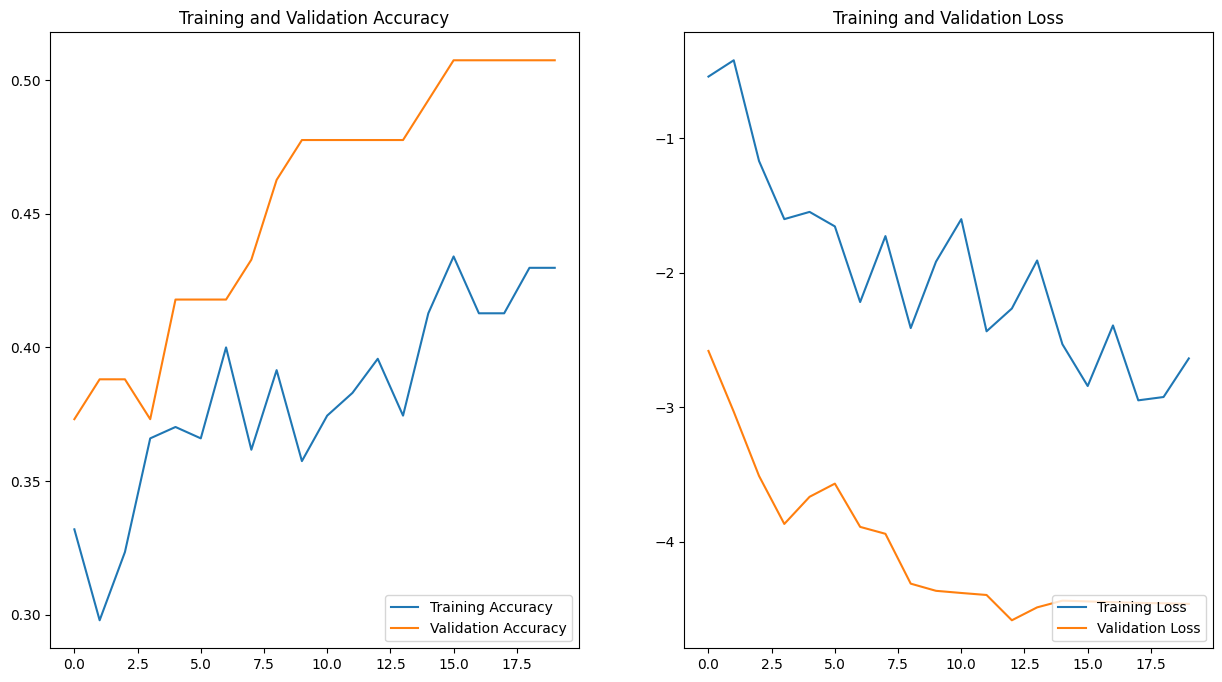

In [157]:
plot_model()

### MODEL EVALUATION

In [158]:
dataset_test_loss, dataset_test_accuracy = model.evaluate(dataset_test)

print('Dataset Test Loss:     %s' % dataset_test_loss)
print('Dataset Test Accuracy: %s' % dataset_test_accuracy)

2/2 [==============================] - 0s 19ms/step - loss: -2.5410 - accuracy: 0.5294
Dataset Test Loss:     -2.5409836769104004
Dataset Test Accuracy: 0.529411792755127


In [161]:
def plot_dataset_predictions(dataset):

    features, labels = dataset_test.as_numpy_iterator().next()

    predictions = model.predict_on_batch(features).flatten()
    predictions = tf.where(predictions < 0.5, 0, 1)

    print('Labels:      %s' % labels)
    print('Predictions: %s' % predictions.numpy())

    plt.gcf().clear()
    plt.figure(figsize = (15, 15))

    for i in range(9):

        plt.subplot(3, 3, i + 1)
        plt.axis('off')

        plt.imshow(features[i].astype('uint8'))
        plt.title(class_names[predictions[i]])

Labels:      [0 2 1 1 1 0 2 0 1 0 0 1 2 0 0 2 1 2 1 1 2 1 0 0 1 0 0 0 0 0 1 2]
Predictions: [0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1]


<Figure size 640x480 with 0 Axes>

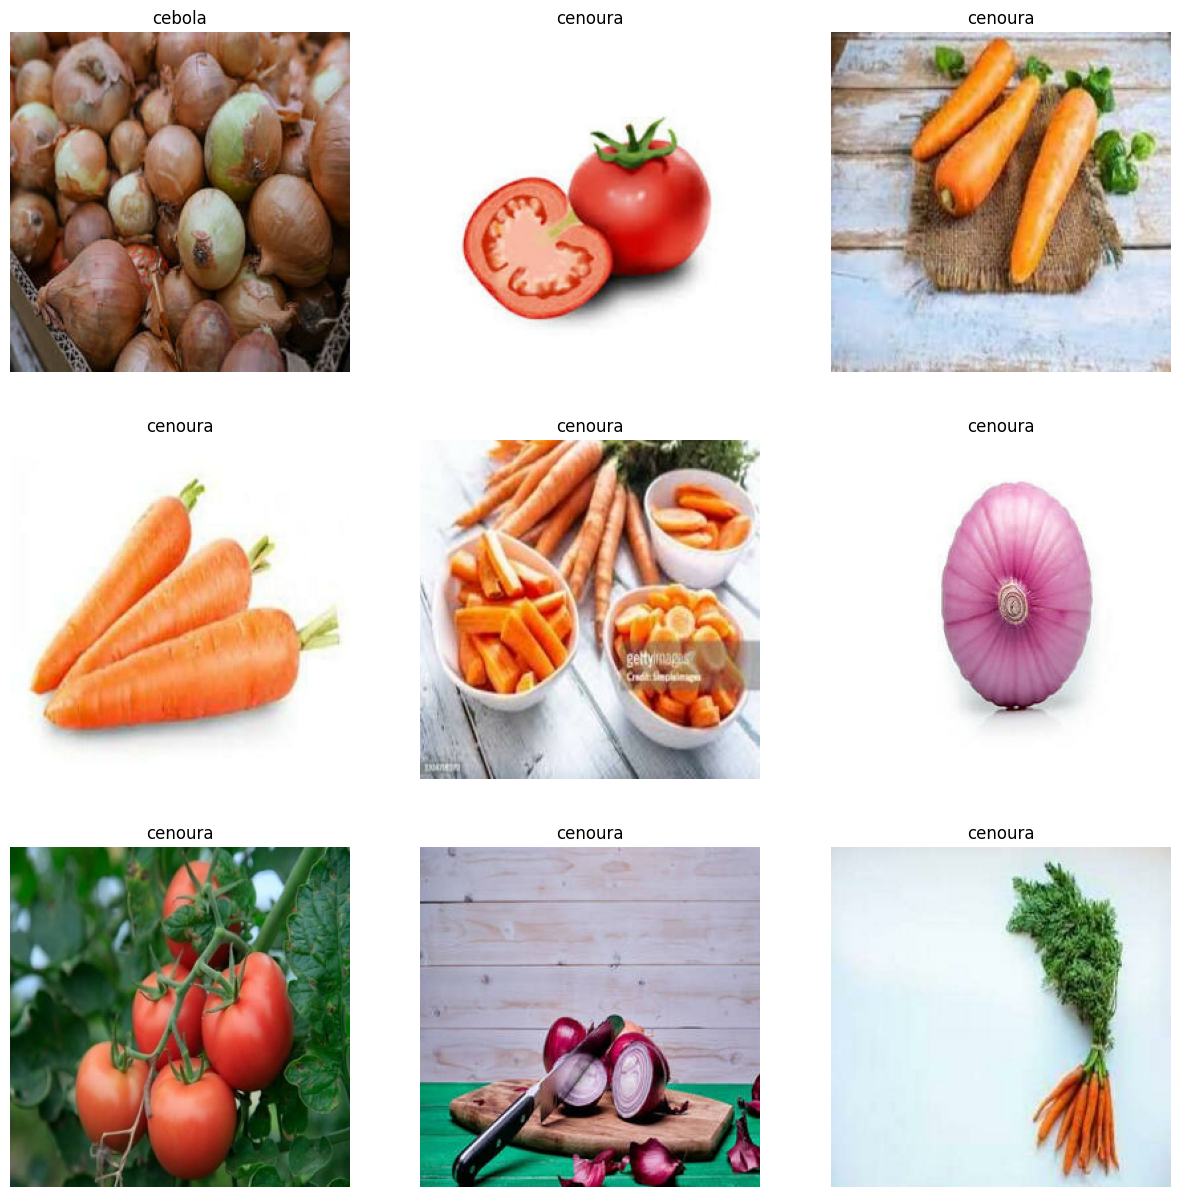

In [162]:
plot_dataset_predictions(dataset_test)

### SAVE & LOAD

In [ ]:
model.save('model')

In [ ]:
model = tf.keras.models.load_model('model')

### PREDICTIONS

In [ ]:
def predict(image_file):

    image = tf.keras.preprocessing.image.load_img(image_file, target_size = image_size)
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = tf.expand_dims(image, 0)

    prediction = model.predict(image)[0][0]

    print('Prediction: {0} | {1}'.format(prediction, ('tomate' if prediction < 0.5 else 'cenoura')))

In [ ]:
def predict_url(image_fname, image_origin):

    image_file = tf.keras.utils.get_file(image_fname, origin = image_origin)
    return predict(image_file)

In [ ]:
predict('chico.png')

In [ ]:
predict_url('cenoura', 'https://www.sciencemag.org/sites/default/files/styles/article_main_large/public/main_puppies_1280p.jpg')